# Question
### How do students of different majors rate the difficulty of COMP 110?
Setup:

In [381]:
%reload_ext autoreload
%autoreload 2

DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

I start by reading the csv data into row format (list of dictionaries).

In [382]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

Next I use the `columnar` function written for ex07 to convert the data to column format (dictionary of column titles as keys and lists as values).

In [383]:
from data_utils import columnar
data_columns: dict[str, list[str]] = columnar(data_rows)

The only fields I'm interested in analyzing are `"primary_major"` and `"difficulty"`. I use the `select` function from ex07 to shrink the table to those two columns.

In [384]:
from data_utils import select
columns_smaller: dict[str, list[str]] = select(data_columns, ["primary_major", "difficulty"])

I wrote `create_filter`, `filtered`, and `averages` based on the lesson on using masks to filter column-based data. `create_filter` selects each item in a list of a certain type and returns a list of their indices. `filtered` takes a list and a filter and returns an abridged version of the original list. `averages` uses the other functions listed to filter data such that each unique major is mapped to a list of difficulty ratings associated with the same major. If there are more than 5 ratings in the data, the function converts the difficulties from strings to integers and calculates the mean value for each major. A dictionary with average difficulties mapped to their respective majors is returned.

### Conclusion:
The majors whose students find COMP 110 easiest are math, computer science, and exercise and sport science. The students who find COMP 110 most difficult major in psychology, environmental science, and information science.

In [402]:
from data_utils import averages
average_difficulties: dict[str, float] = averages(columns_smaller, "primary_major", "difficulty")
print(average_difficulties)

{'Biology': 5.0, 'Biostatistics': 4.833333333333333, 'Business': 4.882352941176471, 'Computer Science': 3.966386554621849, 'Economics': 4.857142857142857, 'Environmental Science': 5.357142857142857, 'Environmental Science ': 5.375, 'Exercise and Sports Science': 4.571428571428571, 'Information Science': 6.0, 'Journalism': 5.0, 'Math': 5.0, 'Math ': 3.75, 'Neuroscience': 4.848484848484849, 'Neuroscience ': 5.2, 'Psychology': 5.7368421052631575, 'Psychology ': 5.891891891891892, 'Statistics': 4.375, 'Statistics ': 5.0476190476190474, 'Undecided': 4.666666666666667}


<AxesSubplot:>

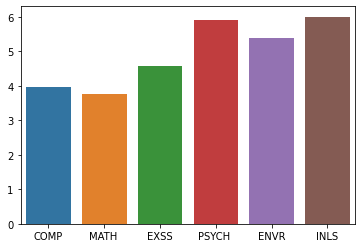

In [408]:
import seaborn

majors: list[str] = []
avs: list[float] = []
abridged: dict[str, float] = {}

abridged["COMP"] = average_difficulties["Computer Science"]
abridged["MATH "] = average_difficulties["Math "]
abridged["EXSS"] = average_difficulties["Exercise and Sports Science"]
abridged["PSYCH "] = average_difficulties["Psychology "]
abridged["ENVR"] = average_difficulties["Environmental Science "]
abridged["INLS"] = average_difficulties["Information Science"]

for key in abridged:
    majors.append(key)
    avs.append(abridged[key])

seaborn.barplot(x=majors, y = avs)